Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


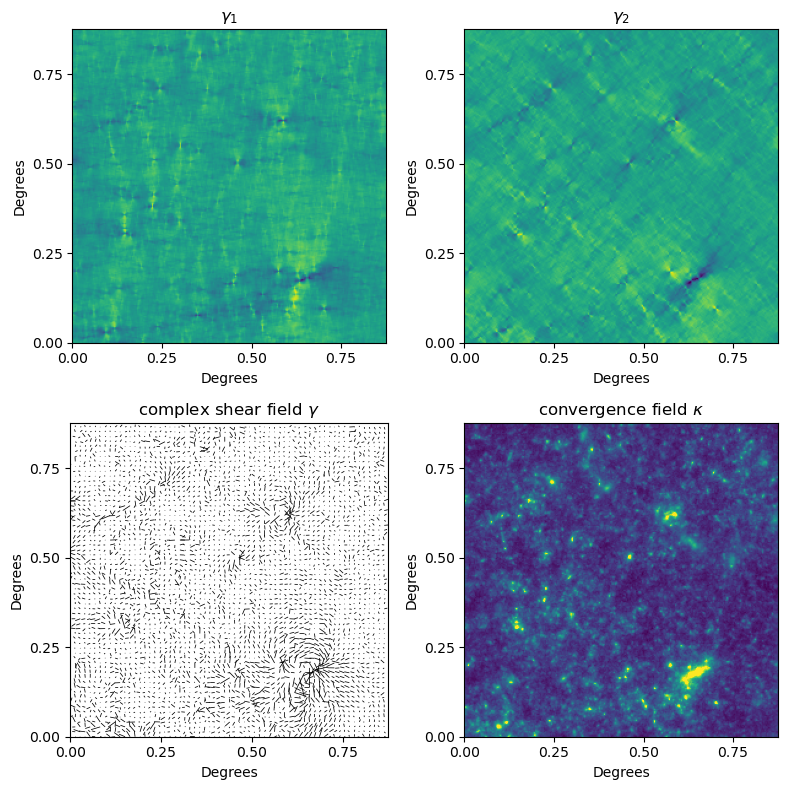

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Initialize the dimensions of the shear fields
n = 256
deg = 3.5 / (1024/n)

# Creating two simple gradient fields for demonstration
x = fits.open('/Users/danny/Desktop/cos0_Set1_rotate1_area1_37_gamma1.fits')[0].data[0:n, 0:n]
y = fits.open('/Users/danny/Desktop/cos0_Set1_rotate1_area1_37_gamma2.fits')[0].data[0:n, 0:n]
k = fits.open('/Users/danny/Desktop/cos0_Set1_rotate1_area1_37_kappa.fits')[0].data[0:n, 0:n]

def combine_shear(shear1, shear2, skip=4, scale_factor=5):
    """
    Prepares the components needed for visualizing two shear fields and their combined vector field.

    Args:
    shear1 (np.ndarray): The first shear field (2D array).
    shear2 (np.ndarray): The second shear field (2D array).
    skip (int): The interval for selecting sparse pixels for visualization.
    scale_factor (int): The factor for scaling the vectors in the quiver plot.

    Returns:
    tuple: Tuple containing components for visualization:
           - First shear field,
           - Second shear field,
           - Sparse X coordinates for quiver plot,
           - Sparse Y coordinates for quiver plot,
           - Sparse and scaled combined vector field.
    """
    # Validate the input shapes
    if shear1.shape != shear2.shape:
        raise ValueError("The two shear fields must have the same dimensions.")

    # Combine the shear fields into a vector field
    combined_vector_field = np.stack((shear1, shear2), axis=-1)

    # Creating pixel coordinate grid
    n = shear1.shape[0]
    x_pixel, y_pixel = np.linspace(0, n-1, n), np.linspace(0, n-1, n)
    X_pixel, Y_pixel = np.meshgrid(x_pixel, y_pixel)

    # Selecting sparse elements for visualization
    X_pixel_sparse = X_pixel[::skip, ::skip]
    Y_pixel_sparse = Y_pixel[::skip, ::skip]
    combined_vector_field_sparse = combined_vector_field[::skip, ::skip, :]

    return shear1, shear2, X_pixel_sparse, Y_pixel_sparse, combined_vector_field_sparse * scale_factor


shear1, shear2, X_sparse, Y_sparse, vector_field_sparse = combine_shear(-x ,y, skip=4, scale_factor=5)
degree_labels = np.arange(0, deg+0.0001, 0.25)

# Adjusting the plot layout to arrange the three plots in a 2x2 grid with one empty block

plt.figure(figsize=(8, 8))

# Plotting the first shear field in the top left position
plt.subplot(2, 2, 1)
plt.imshow(shear1, origin='lower', extent=[0, deg, 0, deg])
plt.title(r"$\gamma_1$")
# plt.colorbar()
plt.xlabel("Degrees")
plt.ylabel("Degrees")
plt.xticks(degree_labels)
plt.yticks(degree_labels)

# Plotting the second shear field in the top right position
plt.subplot(2, 2, 2)
plt.imshow(shear2, origin='lower', extent=[0, deg, 0, deg])
plt.title(r"$\gamma_2$")
# plt.colorbar()
plt.xlabel("Degrees")
plt.ylabel("Degrees")
plt.xticks(degree_labels)
plt.yticks(degree_labels)

# Plotting the combined vector field in the bottom left position
plt.subplot(2, 2, 3)
X_sparse_deg = X_sparse * deg / (n-1)
Y_sparse_deg = Y_sparse * deg / (n-1)
plt.quiver(X_sparse_deg, Y_sparse_deg, vector_field_sparse[:,:,0], vector_field_sparse[:,:,1], 
           headaxislength=0, headlength=0)
plt.title(r"complex shear field $\gamma$")
plt.xlim(0, deg)
plt.ylim(0, deg)
plt.xlabel("Degrees")
plt.ylabel("Degrees")
plt.xticks(degree_labels)
plt.yticks(degree_labels)

# Plotting the convergence
plt.subplot(2, 2, 4)
plt.imshow(k, origin='lower', extent=[0, deg, 0, deg], vmax=0.15)
plt.title(r"convergence field $\kappa$")
# plt.colorbar()
plt.xlabel("Degrees")
plt.ylabel("Degrees")
plt.xticks(degree_labels)
plt.yticks(degree_labels)

plt.tight_layout()
plt.savefig(f'/Users/danny/Desktop/gamma{int(n)}.png', dpi=300)
plt.show()
